In [1]:
# Imports
import pandas as pd
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
dfCSV = pd.read_csv(url, index_col=['Provincia', 'Fecha'])

In [3]:
# Prepare
dfCSV['pctChange'] = dfCSV.groupby(level='Provincia')['Ingresados'].pct_change() * 100

In [4]:
type(dfCSV.loc[['Total', 'Huelva']]['pctChange'].tail(1))

pandas.core.series.Series

In [5]:
dfCSV.loc[['Total', 'Huelva']]['pctChange'].tail(6)

Provincia  Fecha     
Huelva     29/03/2020     9.090909
Total      29/03/2020     8.926876
Huelva     30/03/2020    27.777778
Total      30/03/2020    16.434176
Huelva     31/03/2020     4.347826
Total      31/03/2020     7.338076
Name: pctChange, dtype: float64

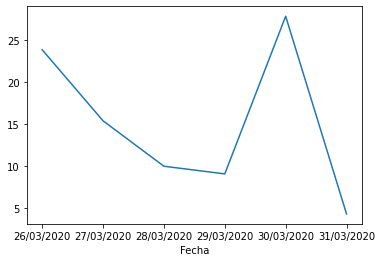

In [6]:
dfCSV.loc['Huelva']['pctChange'].tail(6).plot()

Provincia
Almería    AxesSubplot(0.125,0.125;0.775x0.755)
Cádiz      AxesSubplot(0.125,0.125;0.775x0.755)
Córdoba    AxesSubplot(0.125,0.125;0.775x0.755)
Granada    AxesSubplot(0.125,0.125;0.775x0.755)
Huelva     AxesSubplot(0.125,0.125;0.775x0.755)
Jaén       AxesSubplot(0.125,0.125;0.775x0.755)
Málaga     AxesSubplot(0.125,0.125;0.775x0.755)
Sevilla    AxesSubplot(0.125,0.125;0.775x0.755)
Total      AxesSubplot(0.125,0.125;0.775x0.755)
Name: pctChange, dtype: object

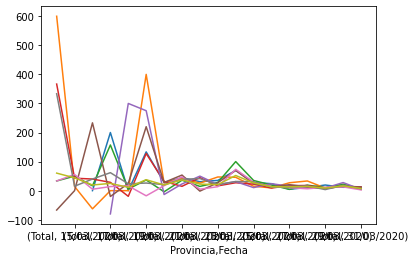

In [7]:
dfCSV.groupby(level='Provincia')['pctChange'].plot()

In [8]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(1)

Provincia  Fecha     
Almería    31/03/2020    12.500000
Cádiz      31/03/2020     4.347826
Córdoba    31/03/2020     7.063197
Granada    31/03/2020    12.778905
Huelva     31/03/2020     4.347826
Jaén       31/03/2020    12.225705
Málaga     31/03/2020     2.758621
Sevilla    31/03/2020     6.382979
Total      31/03/2020     7.338076
Name: pctChange, dtype: float64

In [9]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(2).describe()

count    18.000000
mean     12.787612
std       6.806337
min       2.758621
25%       7.131917
50%      12.639452
75%      16.189801
max      27.777778
Name: pctChange, dtype: float64

In [10]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(1)

Provincia  Fecha     
Almería    31/03/2020    12.500000
Cádiz      31/03/2020     4.347826
Córdoba    31/03/2020     7.063197
Granada    31/03/2020    12.778905
Huelva     31/03/2020     4.347826
Jaén       31/03/2020    12.225705
Málaga     31/03/2020     2.758621
Sevilla    31/03/2020     6.382979
Total      31/03/2020     7.338076
Name: pctChange, dtype: float64

Provincia
Almería    AxesSubplot(0.125,0.125;0.775x0.755)
Cádiz      AxesSubplot(0.125,0.125;0.775x0.755)
Córdoba    AxesSubplot(0.125,0.125;0.775x0.755)
Granada    AxesSubplot(0.125,0.125;0.775x0.755)
Huelva     AxesSubplot(0.125,0.125;0.775x0.755)
Jaén       AxesSubplot(0.125,0.125;0.775x0.755)
Málaga     AxesSubplot(0.125,0.125;0.775x0.755)
Sevilla    AxesSubplot(0.125,0.125;0.775x0.755)
Total      AxesSubplot(0.125,0.125;0.775x0.755)
Name: pctChange, dtype: object

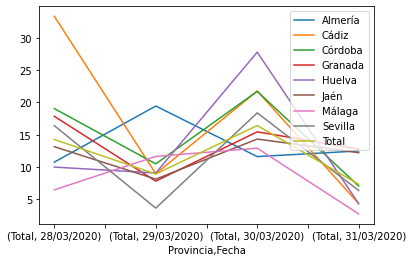

In [11]:
dias = 4
dfCSV[dias*-9:].groupby(level='Provincia')['pctChange'].plot(legend=True)

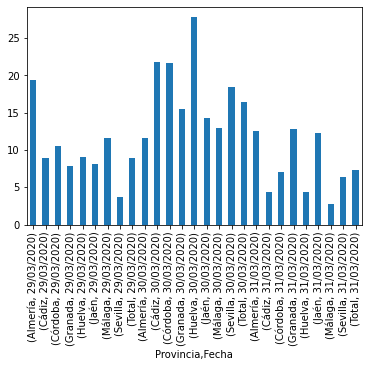

In [12]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(3).plot(kind='bar')

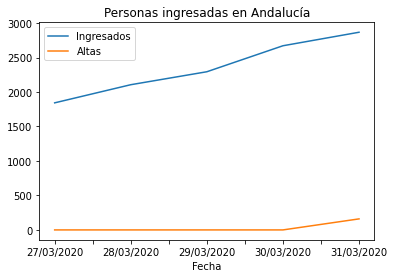

In [13]:
dfCSV.loc['Total'][['Ingresados', 'Altas']].tail(5).plot(title='Personas ingresadas en Andalucía')

In [14]:
provincia_select = 'Total'
data = dfCSV.loc[provincia_select][['Ingresados']]
data['pctChange'] = data['Ingresados'].pct_change()*100

In [15]:
title = 'Variación personas ingresadas últimos días en ' + provincia_select
print(title)
print(data[-3:][['pctChange']])
data[-3:]['pctChange'].describe()

Variación personas ingresadas últimos días en Total
            pctChange
Fecha                
29/03/2020   8.926876
30/03/2020  16.434176
31/03/2020   7.338076


count     3.000000
mean     10.899709
std       4.858376
min       7.338076
25%       8.132476
50%       8.926876
75%      12.680526
max      16.434176
Name: pctChange, dtype: float64

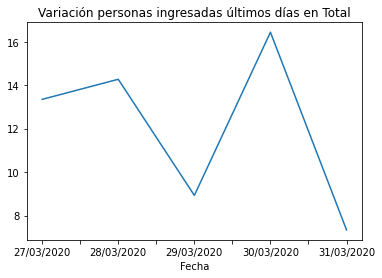

In [16]:
data[-5:]['pctChange'].plot(kind='line', title=title)

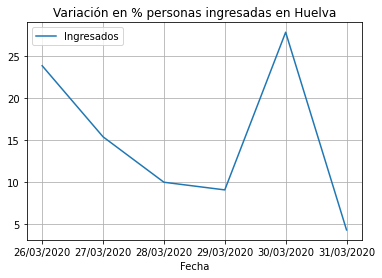

In [17]:
provincia_title = 'Huelva'
provincia_data = dfCSV.loc[provincia_title][-7:][['Ingresados']].pct_change()*100
provincia_data.plot(kind='line', title='Variación en % personas ingresadas en ' + provincia_title, grid=True);

In [18]:
provincia_data.describe()

,Ingresados
count,6.000000
mean,15.068442
std,9.103684
min,4.347826
25%,9.318182
50%,12.692308
75%,21.703297
max,27.777778
